In [24]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.stats import norm
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [25]:
x = np.arange(0,1,0.002)

In [26]:
y = norm.rvs(0,size=500,scale=0.1)

In [27]:
y = y + x**2 

In [28]:
def rmse(y_test, y):
    return sp.sqrt(sp.mean((y_test - y)**2))

In [29]:
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()

In [30]:
def R22(y_test, y_true):
    y_mean = np.array(y_true)
    y_mean = y_mean.mean()
    return 1 - rmse(y_test, y_true) / rmse(y_mean, y_true)

In [37]:
plt.scatter(x, y, s=5)
degree = [1,2,100]
y_test = []
y_test = np.array(y_test)

[-0.15459236  0.97974831]
rmse=0.13, R2=0.82, R22=0.58, clf.score=0.82
[ 0.01105765 -0.02216705  1.00796314]
rmse=0.11, R2=0.88, R22=0.65, clf.score=0.88
[  1.08594585e-02   2.26858818e+01  -2.86822861e+03   1.44254774e+05
  -3.96517968e+06   6.76179165e+07  -7.65567710e+08   5.99073508e+09
  -3.31140081e+10   1.29977592e+11  -3.56837469e+11   6.50495243e+11
  -6.71088920e+11   1.15613711e+11   5.13041996e+11  -2.56316779e+11
  -4.44494149e+11   1.55578894e+11   4.51774365e+11   7.83057090e+10
  -3.37292947e+11  -3.43887433e+11   2.44563945e+10   3.40975182e+11
   3.04185433e+11   3.51135746e+10  -2.45331808e+11  -3.29667939e+11
  -1.86666779e+11   8.18869769e+10   2.75283518e+11   2.89553004e+11
   1.45904125e+11  -4.51732742e+10  -2.12830287e+11  -2.86324900e+11
  -2.09812260e+11  -4.80356746e+10   1.08383125e+11   2.37435257e+11
   2.54349150e+11   1.78247214e+11   4.99793856e+10  -8.83306633e+10
  -1.99647165e+11  -2.34706062e+11  -2.02260417e+11  -1.13473522e+11
   9.95731558e+09 

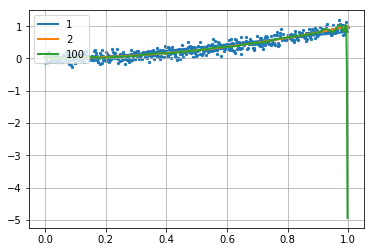

In [38]:
for d in degree:
    clf = Pipeline([('poly',PolynomialFeatures(degree=d)),('linear',LinearRegression(fit_intercept=False))])
    clf.fit(x[:498, np.newaxis], y[:498])
    y_test = clf.predict(x[:, np.newaxis])
    
    print(clf.named_steps['linear'].coef_)
    print('rmse=%.2f, R2=%.2f, R22=%.2f, clf.score=%.2f' % (rmse(y_test, y),
                                                           R2(y_test, y),
                                                           R22(y_test, y),
                                                           clf.score(x[:, np.newaxis], y)))
    
    plt.plot(x, y_test, linewidth=2)
    
plt.grid()
plt.legend(['1','2','100'], loc='upper left')
plt.show()

[ 0.          0.74895429]
rmse=0.16, R2=0.75, R22=0.50, clf.score=0.75
[ 0.          0.27802414  0.61780093]
rmse=0.12, R2=0.86, R22=0.63, clf.score=0.86
[  0.00000000e+00   2.70354561e-01   3.13381125e-01   2.32846217e-01
   1.54977665e-01   9.97255697e-02   6.37391623e-02   4.09300654e-02
   2.65485554e-02   1.74393948e-02   1.16148537e-02   7.84495418e-03
   5.37120995e-03   3.72425884e-03   2.61153533e-03   1.84889900e-03
   1.31911128e-03   9.46555101e-04   6.81764768e-04   4.91893840e-04
   3.54792860e-04   2.55294250e-04   1.82856047e-04   1.30048904e-04
   9.15712301e-05   6.35985621e-05   4.33469900e-05   2.87754697e-05
   1.83795831e-05   1.10464475e-05   5.95118284e-06   2.48208834e-06
   1.85973487e-07  -1.27215000e-06  -2.13900154e-06  -2.59538048e-06
  -2.77291430e-06  -2.76663759e-06  -2.64444783e-06  -2.45421119e-06
  -2.22909479e-06  -1.99155844e-06  -1.75633269e-06  -1.53263103e-06
  -1.32578418e-06  -1.13843963e-06  -9.71435098e-07  -8.24428351e-07
  -6.96346087e-07 

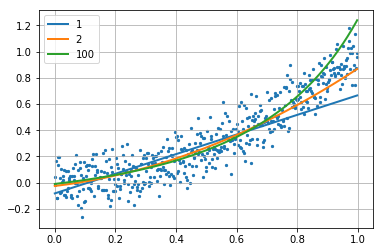

In [47]:
plt.scatter(x, y, s=5)
degree = [1,2,100]
y_test = []
y_test = np.array(y_test)

for d in degree:
    clf = Pipeline([('poly',PolynomialFeatures(degree=d)),('linear',linear_model.Ridge())])
# clf = linear_model.Ridge(alpha=.5)
    clf.fit(x[:400, np.newaxis], y[:400])
    y_test = clf.predict(x[:, np.newaxis])

    print(clf.named_steps['linear'].coef_)
    print('rmse=%.2f, R2=%.2f, R22=%.2f, clf.score=%.2f' % (rmse(y_test, y),
                                                           R2(y_test, y),
                                                           R22(y_test, y),
                                                           clf.score(x[:, np.newaxis], y)))

    plt.plot(x, y_test, linewidth=2)
    
plt.grid()
plt.legend(['1','2','100'], loc='upper left')
plt.show()